In [85]:
from sympy import symbols, init_printing, Matrix,simplify,I,eye
init_printing()

In [86]:
H1,H2,H3,H4,H5,H6,H7 = symbols('H_1,H_2,H_3,H_4,H_5,H_6,H_7')
mi,mj,M1,M2 = symbols('m_i,m_j,M_1,M_2 ',positive=True)
C0,C1,C2 = symbols('C_0,C_1,C_2')
X1,X2,X3,X4 = symbols('X_1,X_2,X_3,X_4')
cambiosH = {H7:M1*M2*C0,H4:mi*M2*X3,H5:mj*M1*X4,H2:mi*mj*X2,H1:X1,H6:-mi*M1*C1,H3:mj*M2*C2}
cambiosX = {X2:C0 + C2 - C1,X3:C0 - C1,X4:C0 + C2}

In [87]:
def I2(M):
    if isinstance(M,Matrix):
        return (M.trace()**2 - (M*M).trace())/2 

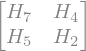

In [88]:
Ht = Matrix([[H7,H4],[H5,H2]])
Ht

In [89]:
(Ht.subs(cambiosH)).det().simplify().subs(cambiosX).simplify()

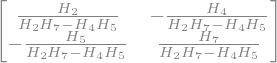

In [90]:
Ht.inv()

In [94]:
Ht.rank()

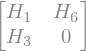

In [8]:
Hh = Matrix([[H1,H6],[H3,0]])
Hh

In [9]:
(Hh.subs(cambiosH)).det().simplify().subs(cambiosX).simplify()

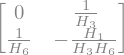

In [10]:
Hh.inv()

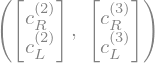

In [11]:
c2R, c2L = symbols('{{c^{(2)}_R}}, {{c^{(2)}_L}}')
c3R, c3L = symbols('{{c^{(3)}_R}}, {{c^{(3)}_L}}')
c2 = Matrix([[c2R],[c2L]])
c3 = Matrix([[c3R],[c3L]])
c2,c3

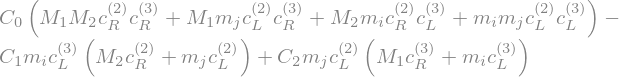

In [12]:
display((c2.T*Ht*c3)[0].expand())
(c2.T*Ht*c3)[0].expand().subs(cambiosH).simplify().subs(cambiosX).expand().collect([C0,C1,C2],simplify)

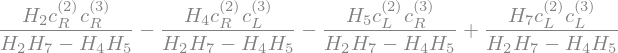

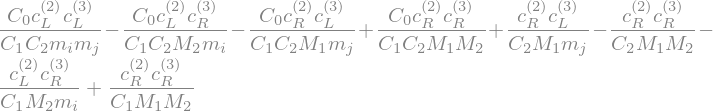

In [13]:
display((c2.T*Ht.inv()*c3)[0].expand())
(c2.T*Ht.inv()*c3)[0].expand().factor().subs(cambiosH).factor().subs(cambiosX).expand()

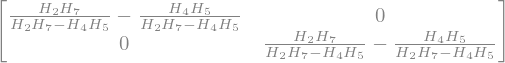

In [14]:
Ht.inv()*Ht#*Ht.inv()

In [15]:
(c2.T*Hh*c3)[0].expand()

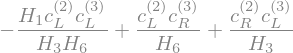

In [16]:
(c2.T*Hh.inv()*c3)[0].expand()

# Contribuciones con un neutrino en el loop


Analizem0 os que sucede con la notación para los factores de forma en términos de matrices. En el caso de todas las contribuciones de este tipo, los facotres de forma adquieren la siguiente estructura:
$$A_R^{a} = c_R^{(2)}c_R^{(3)} H_{RR} + c_R^{(2)}c_L^{(3)} H_{RL} + c_L^{(2)}c_R^{(3)} H_{LR} + c_L^{(2)}c_L^{(3)} H_{LL}$$
la cual puede ser rescrita de la siguiente manera

$$A_R^{a} = {c^{(2)}}^{\top}\cdot H \cdot c^{(3)}$$
donde 

$$c^{(i)} = 
\begin{pmatrix}
c^{(i)}_R\\
c^{(i)}_L
\end{pmatrix}
$$
y
$$H = 
\begin{pmatrix}
H_{RR} & H_{RL}\\
H_{LR} & H_{LL}
\end{pmatrix}
$$

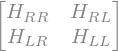

In [17]:
HRR,HRL,HLR,HLL = symbols('H_{RR},H_{RL},H_{LR},H_{LL}')
H = Matrix([[HRR,HRL],[HLR,HLL]])
H

In [18]:
(c2.T*H*c3)[0].expand()

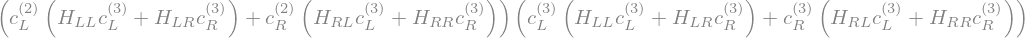

In [19]:
(c2.T*(H*(c3*c3.T)*H.T)*c3)[0].simplify()

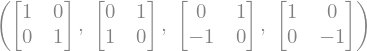

In [20]:
s0 = Matrix([[1,0],[0,1]])
s1 = Matrix([[0,1],[1,0]])
s2 = Matrix([[0,-I],[I,0]])
s3 = Matrix([[1,0],[0,-1]])
s = s0,s1,I*s2,s3
s

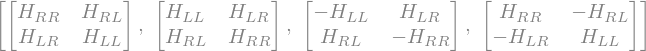

In [21]:
[a*H*a for a in s]

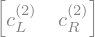

In [22]:
c2.T*s1

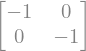

In [25]:
I*s0*s1*s2*s3

In [32]:
σ0,σ1,σ2,σ3 = symbols('sigma_0,sigma_1,sigma_2,sigma_3')
ga0 = Matrix([[0,σ0],[σ0,0]])
gai = lambda c: Matrix([[0,c],[-c,0]])

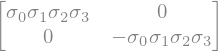

In [27]:
ga0*gai(σ1)*gai(σ2)*gai(σ3)

## Contribution FSS


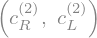

In [30]:
c2[0],c2[1]

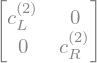

In [76]:
v = lambda c: Matrix([[c[1],0],[0,c[0]]])
v3 = v(c3)
v2 = v(c2)
v2

In [77]:
σ = lambda s: symbols(fr'{{\sigma^{{{s}}}}}',commutative=False)
σb = lambda s: symbols(fr'{{\overline{{\sigma}}^{{{s}}}}}',commutative=False) 
σ(1)
σb('\mu')

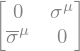

In [78]:
ga = lambda s: Matrix([[0,σ(s)],[σb(s),0]])
ga('\mu')

In [79]:
FV = lambda p,mu: symbols(f'{p}_{{{mu}}}')
FV('k','\mu')

In [80]:
mu,nu,a,b = 'μ','ν','α','β'
k,p1,p2 = 'k','p_1','p_2'
M0 = symbols('M0',positive=True)
mu,nu,a,b

('μ', 'ν', 'α', 'β')

In [81]:
MFSS = FV('k',mu)*v3*ga(mu)*v2 + M0*v3*v2 
MFSS

⎡              M₀⋅{{c_L}}__{(2)}⋅{{c_L}}__{(3)}                k_{μ}⋅{{c_R}}__
⎢                                                                             
⎣k_{μ}⋅{{c_L}}__{(2)}⋅{{c_R}}__{(3)}⋅{\overline{\sigma}__{μ}}          M₀⋅{{c_

{(2)}⋅{{c_L}}__{(3)}⋅{\sigma__{μ}}⎤
                                  ⎥
R}}__{(2)}⋅{{c_R}}__{(3)}         ⎦

## Contribucion FSV

In [84]:
M1 = FV('k',mu)*v3*(ga(mu) + M0*eye(2))*ga(a)*v2
M1

⎡k_{μ}⋅{{c_L}}__{(2)}⋅{{c_L}}__{(3)}⋅{\sigma__{μ}}⋅{\overline{\sigma}__{α}}   
⎢                                                                             
⎣     M₀⋅k_{μ}⋅{{c_L}}__{(2)}⋅{{c_R}}__{(3)}⋅{\overline{\sigma}__{α}}        k

          M₀⋅k_{μ}⋅{{c_R}}__{(2)}⋅{{c_L}}__{(3)}⋅{\sigma__{α}}           ⎤
                                                                         ⎥
_{μ}⋅{{c_R}}__{(2)}⋅{{c_R}}__{(3)}⋅{\overline{\sigma}__{μ}}⋅{\sigma__{α}}⎦